Homework 5: https://www.work.caltech.edu/homework/hw5.pdf

Solution key 5: https://www.work.caltech.edu/homework/hw5_sol.pdf

# Homework 5


- Student Name: Nguyễn Tấn Lộc
- Student ID: 21127099

---

## References:

Lecture 09 - The Linear Model II: https://youtu.be/qSTHZvN8hzs

Lecture 10 - Neural Networks: https://youtu.be/Ih5Mr93E-2c

---

### Import necessary libraries

In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np

##  Linear Regression Error

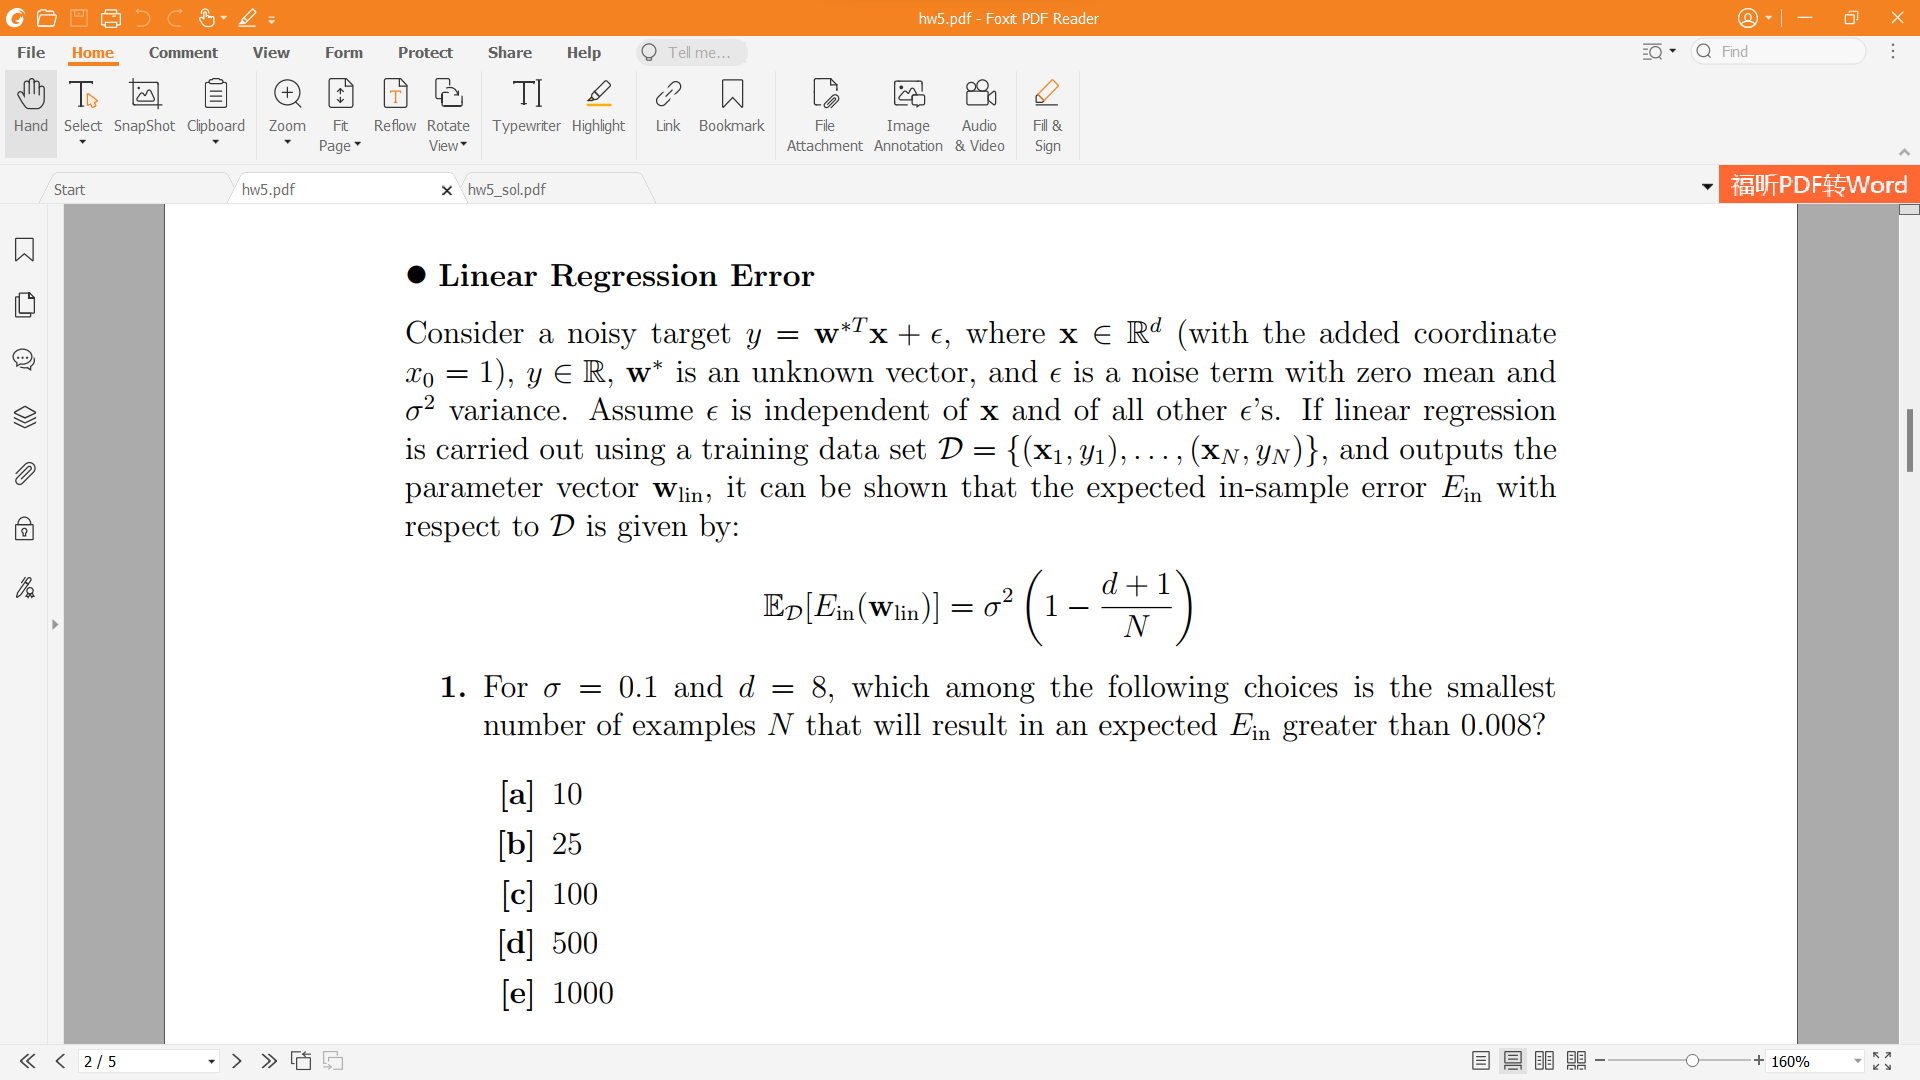

## 1. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Python code below)

<font color='yellow'><b>Therefore, the smallest N is: [c] 100.</b></font>


In [17]:
# Given parameters
sigma = 0.1
d_value = 8
choices = [10, 25, 100, 500, 1000]
error_bound = 0.008


# Iterate through each value in the list to find the best N satisfying conditions
for N_val in choices:
    # Calculate the expected error
    expected_error = sigma ** 2 * (1 - (d_value + 1) / N_val)
    
    # Display the expected error for each N
    print("N =", N_val, "=> Expected In-Sample Error:", expected_error)
    
    # Check if the expected error exceeds the bound and if N is smaller than the current best_N
    if expected_error > error_bound and N_val < max(choices):
        best_N = N_val  # Update the best_N if conditions are met

# Output the best N that satisfies the conditions
print("Solution:", best_N)

N = 10 => Expected In-Sample Error: 0.001
N = 25 => Expected In-Sample Error: 0.006400000000000001
N = 100 => Expected In-Sample Error: 0.009100000000000002
N = 500 => Expected In-Sample Error: 0.009820000000000002
N = 1000 => Expected In-Sample Error: 0.009910000000000002
Solution: 500


## Nonlinear Transforms

# 2 - 3

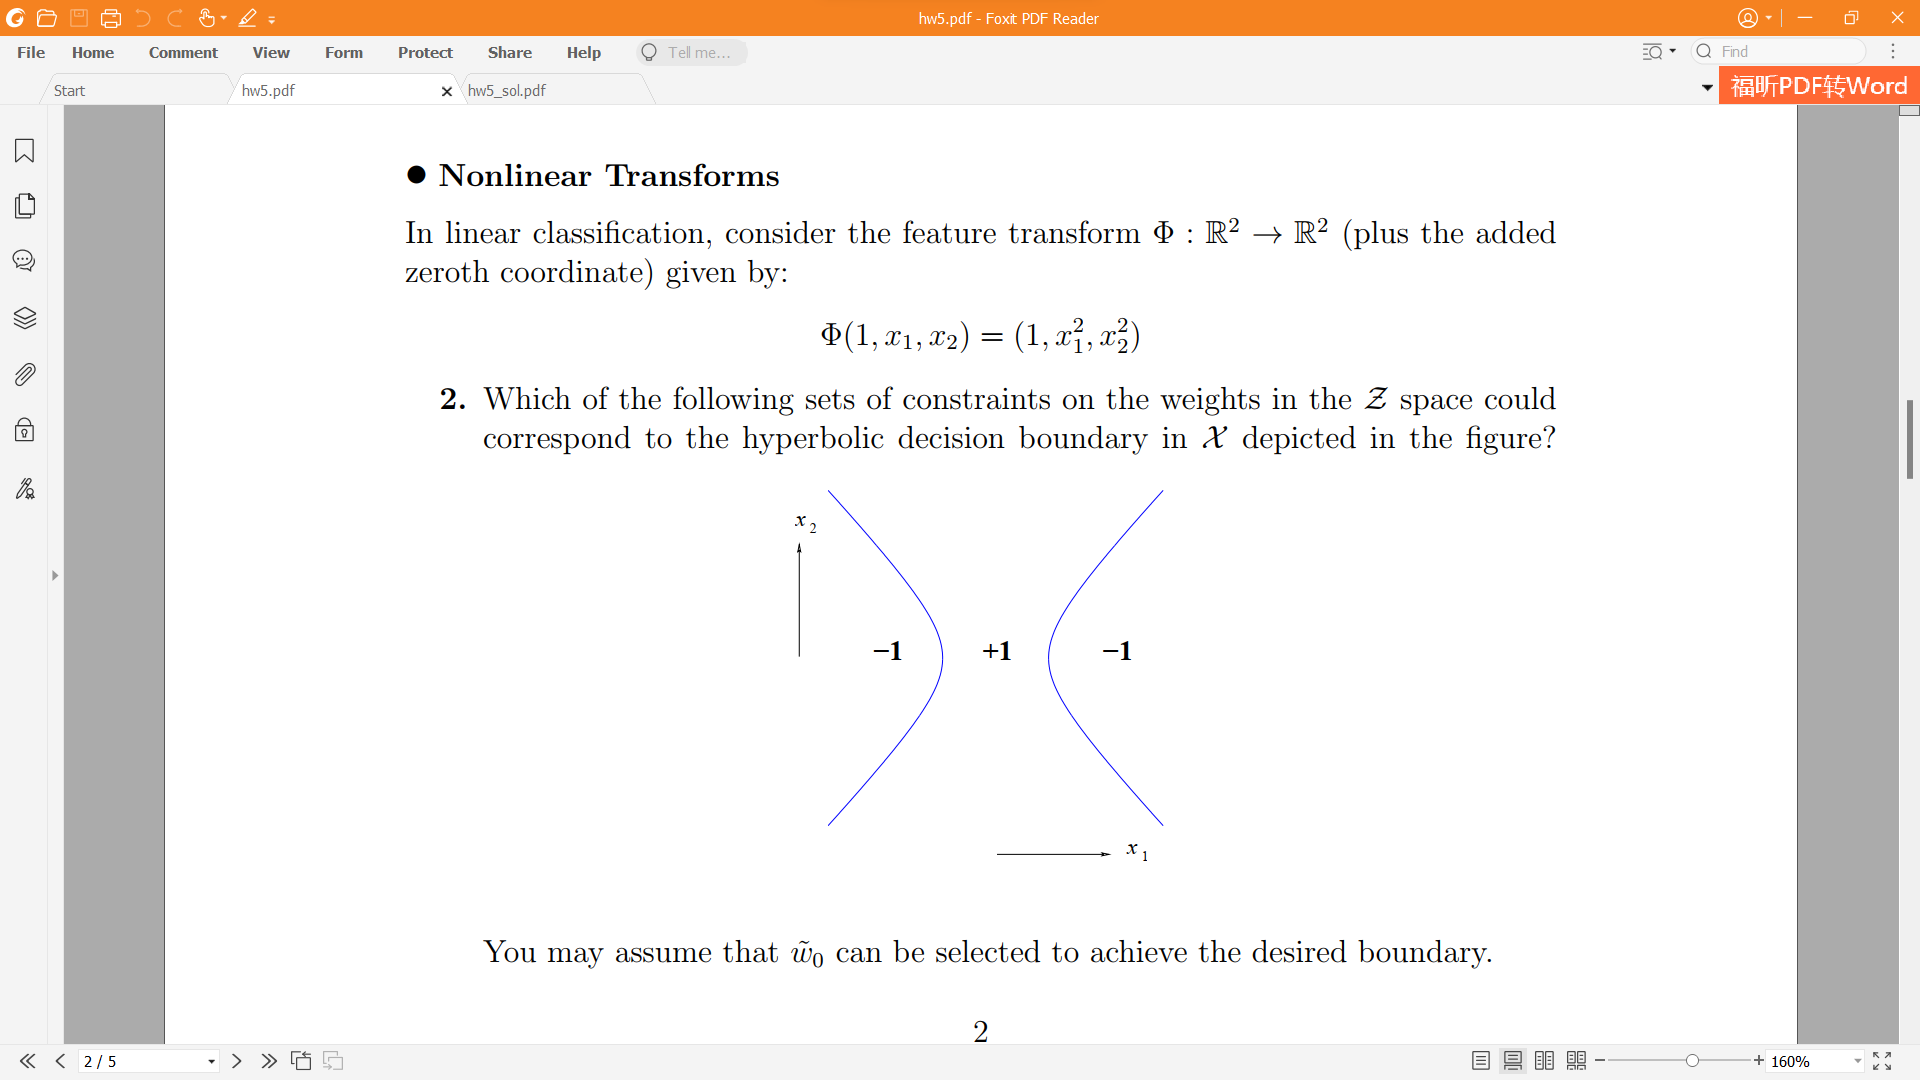

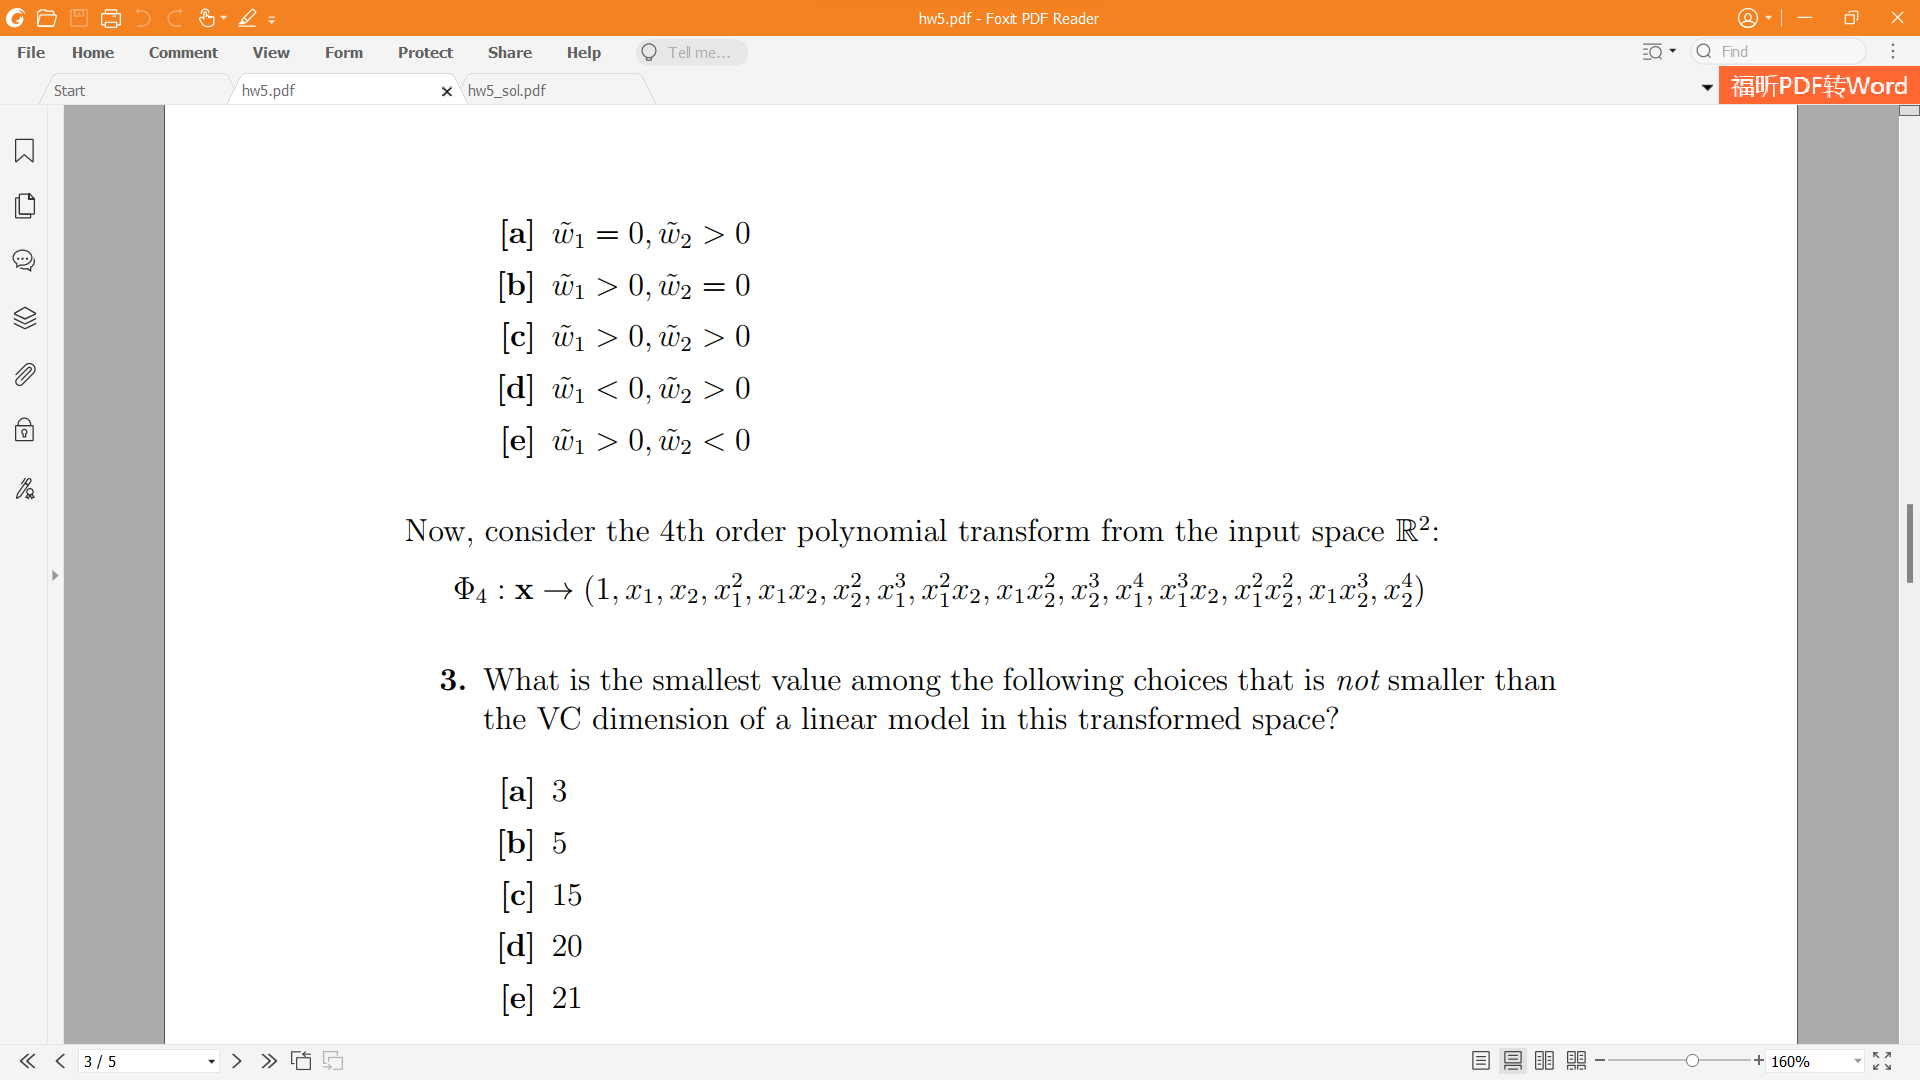

## 2. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Python code below)

We need to  select the weight vector $\tilde{w}$ in the transformed space from several provided options to achieve the desired boundary.

First, we plot it. All the plots below was generated by choosing $\tilde{w}$ for each answer, and [d] looks correct.

<font color='yellow'><b>Therefore, the correct answer is: [d].</b></font>


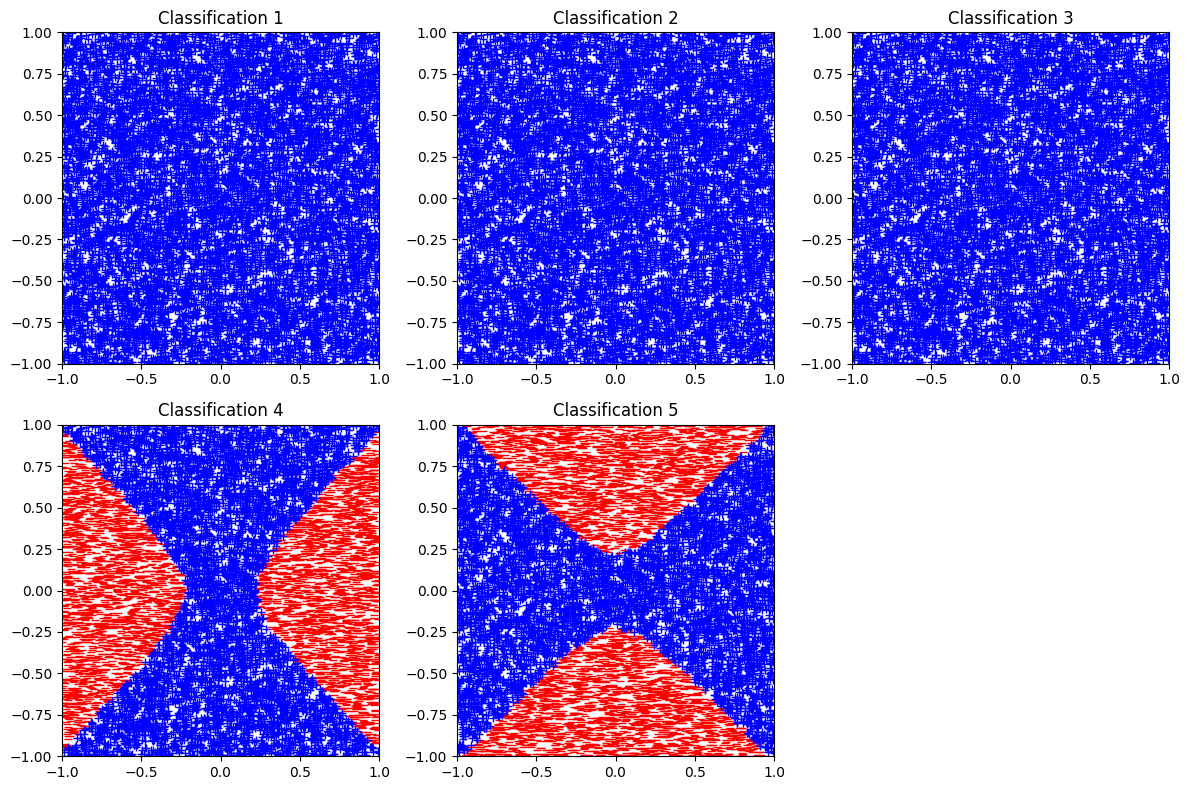

In [18]:
plt.figure(figsize=(12, 8))

N = 10000 
w_ = [np.array([0.5, 0, 10]), np.array([0.5, 10, 0]), np.array([0.5, 10, 10]), np.array([0.5, -10, 10]),
      np.array([0.5, 10, -10])]

x1 = np.random.uniform(-1, 1, N)
x2 = np.random.uniform(-1, 1, N)

for i, w in enumerate(w_):
    plt.subplot(2, 3, i+1)  
    plt.title(f'Classification {i+1}')
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)

    classification = np.sign(np.dot(np.array([np.ones(N), x1 * x1, x2 * x2]).T, w))
    plt.plot(x1[classification == -1], x2[classification == -1], 'r_')  # Points classified as -1
    plt.plot(x1[classification == +1], x2[classification == +1], 'b+')   # Points classified as +1

plt.tight_layout() 
plt.show()


### 3. What is the smallest value among the following choices that is not smaller than the VC dimension of a linear model in this transformed space?

[a] 3

[b] 5

[c] 15

[d] 20

[e] 21

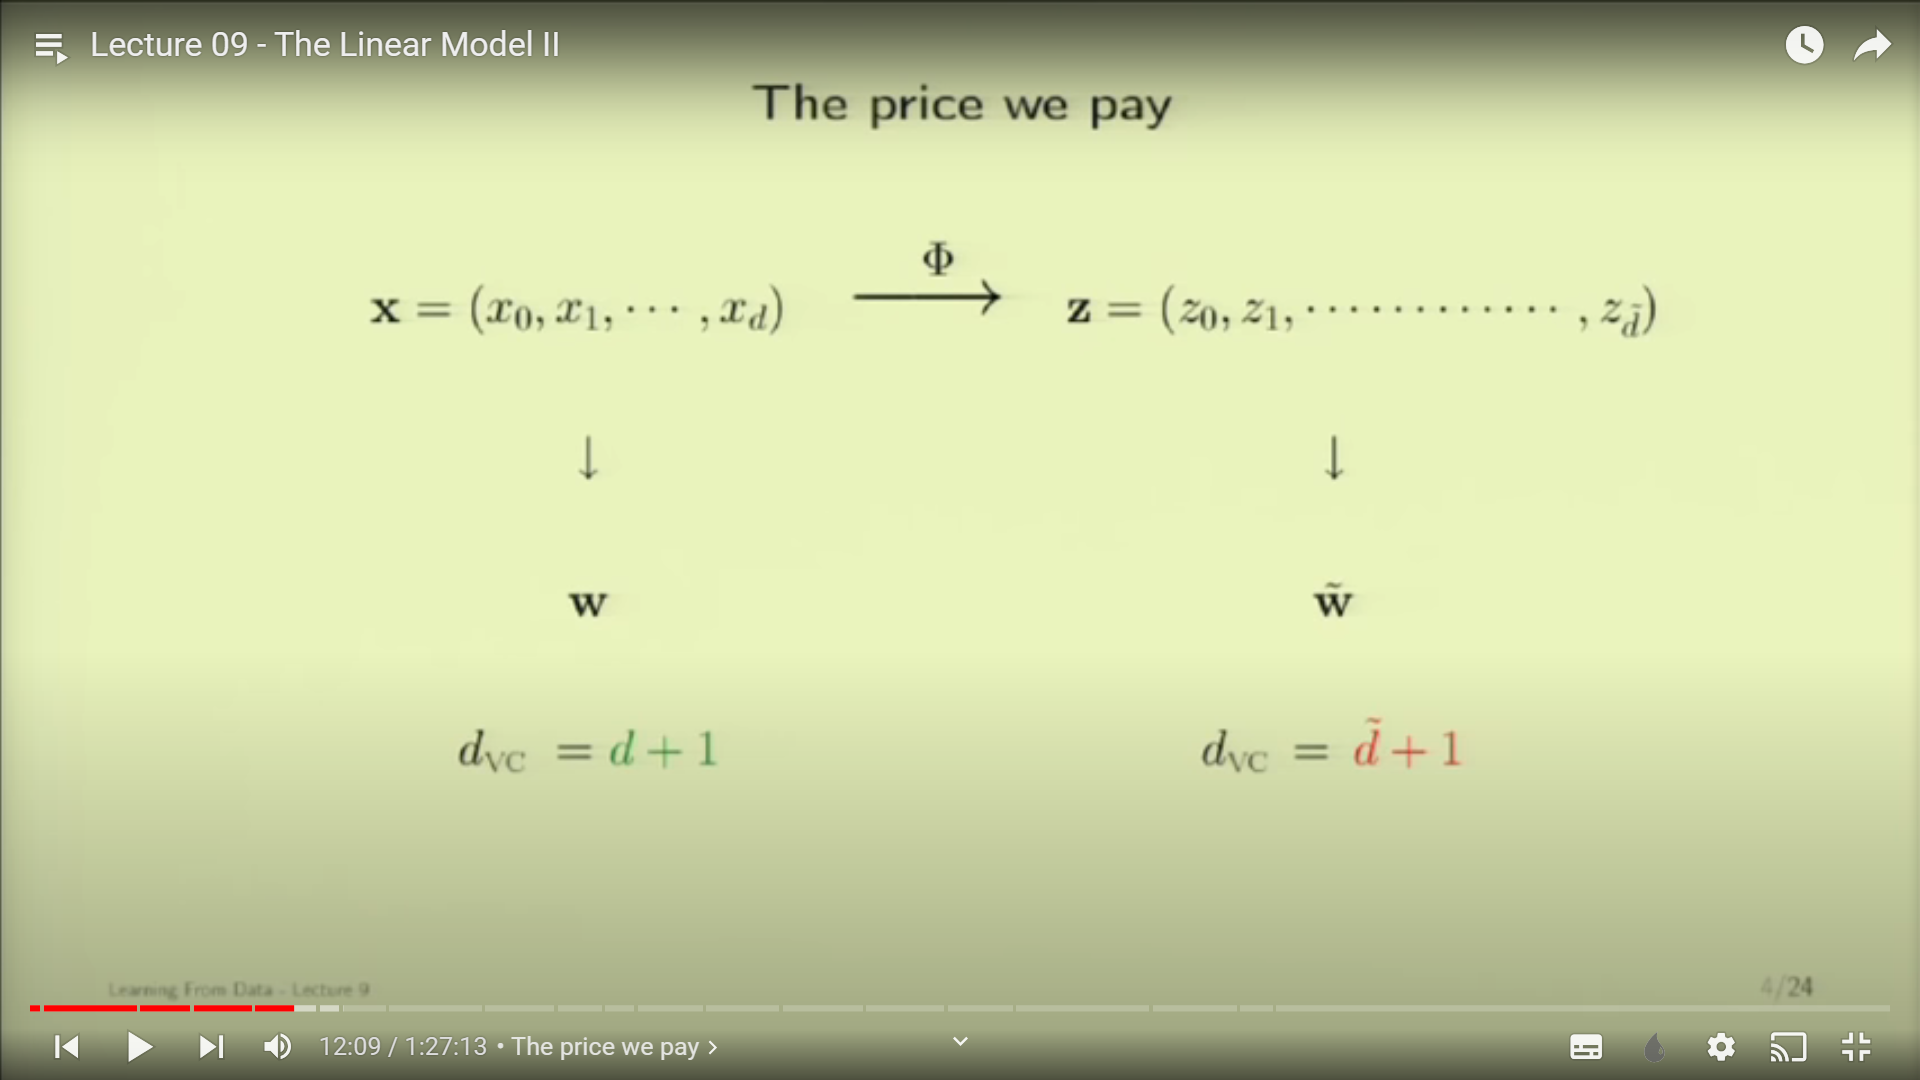

## 3. Explanation and Answer
<u><i><b>Explain</b></i></u>:

From Lecture 9, Slide 4, $d_{VC} \leq d+1$ for $x$, $d_{VC} \leq \tilde{d}+1$ for $z$

$d_{VC} \leq \tilde{d}+1=14+1=15$

<font color='yellow'><b>Therefore, the smallest value is: [d] 15.</b></font>


##   Gradient Descent

# 4 - 7

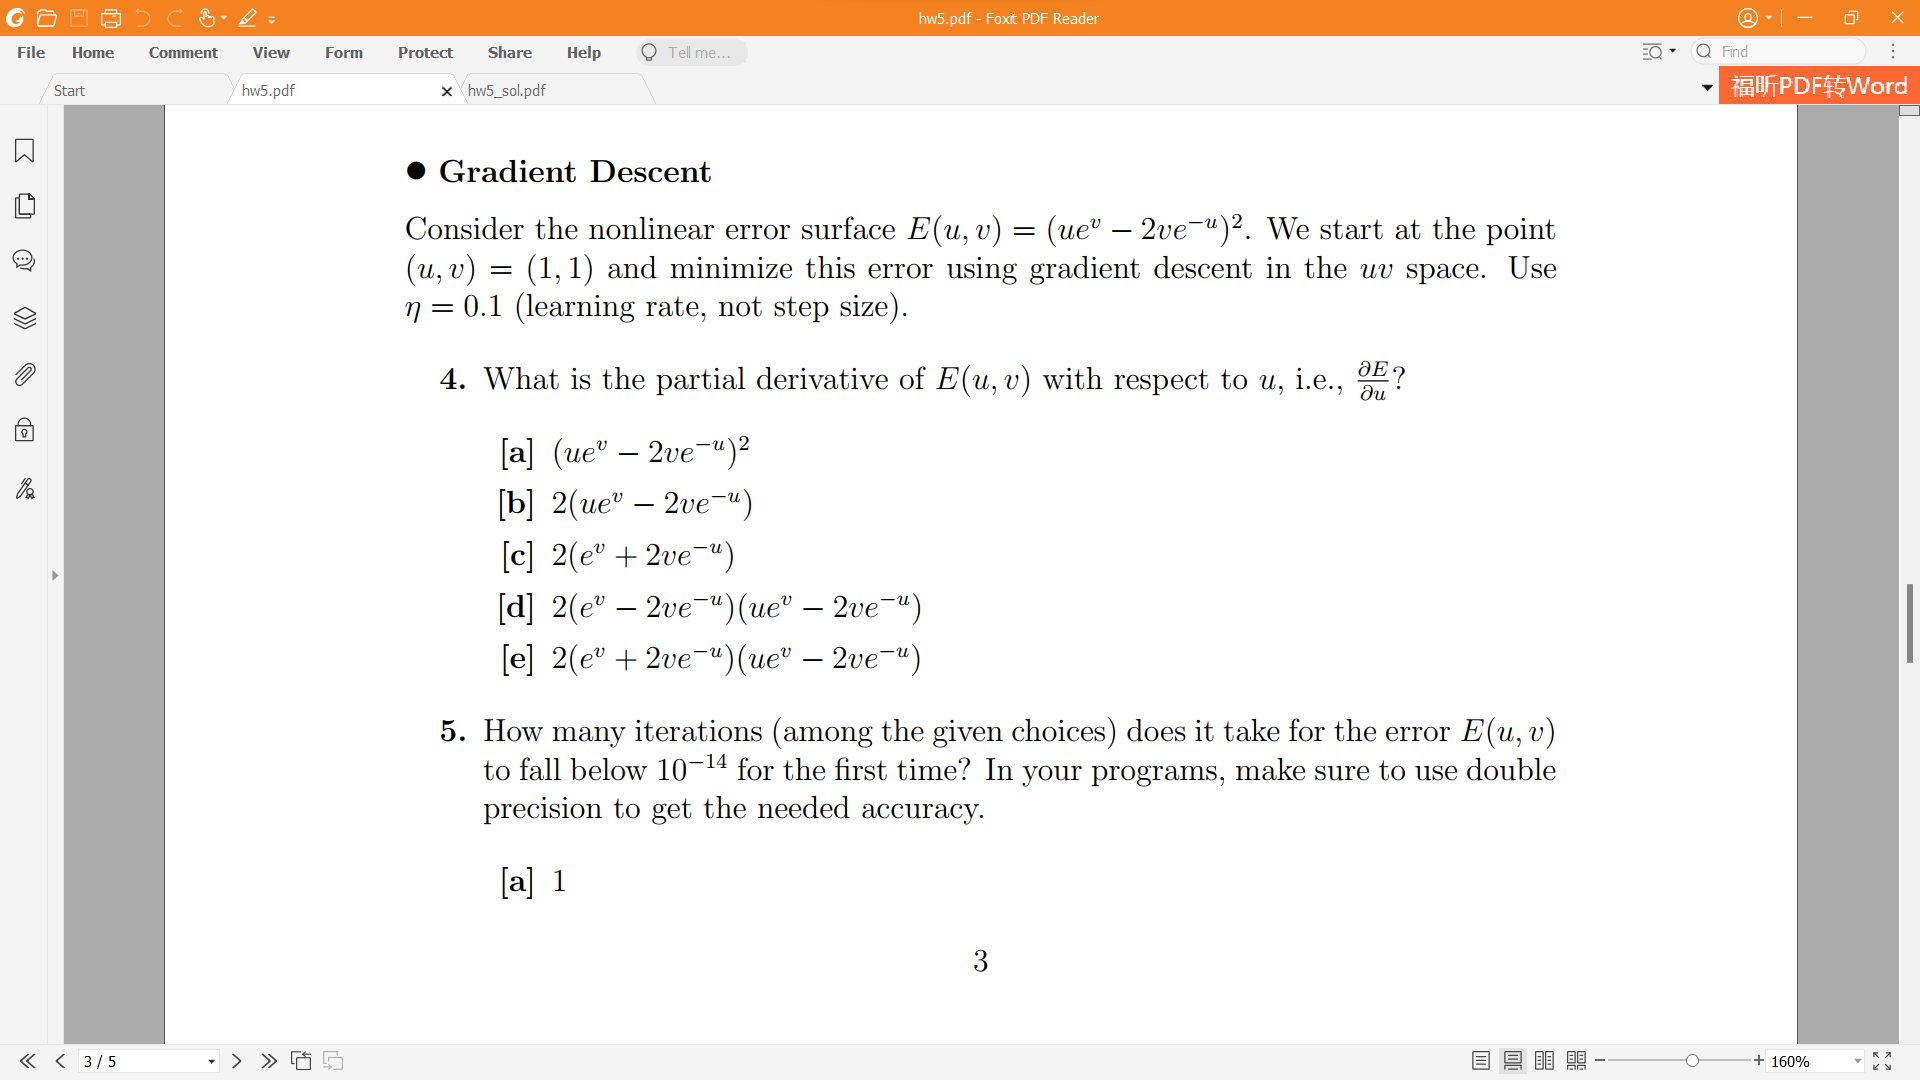

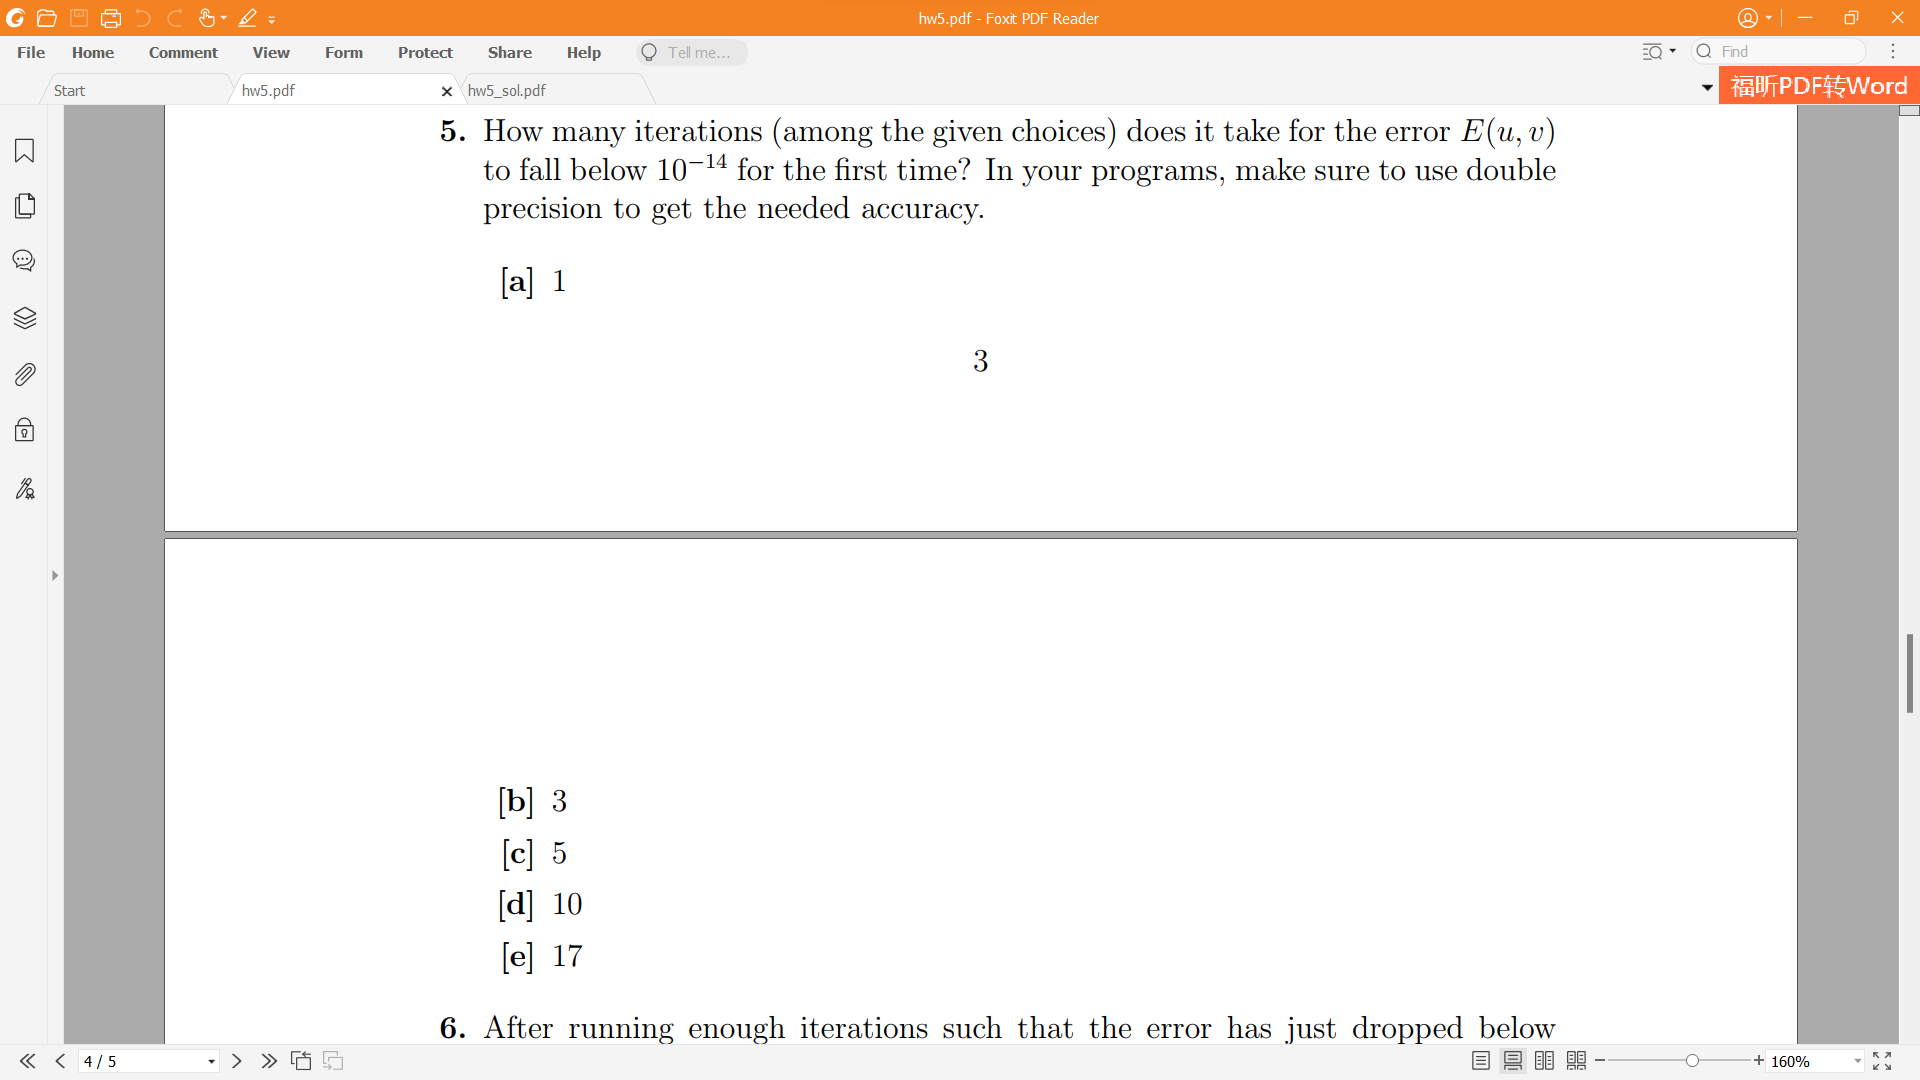

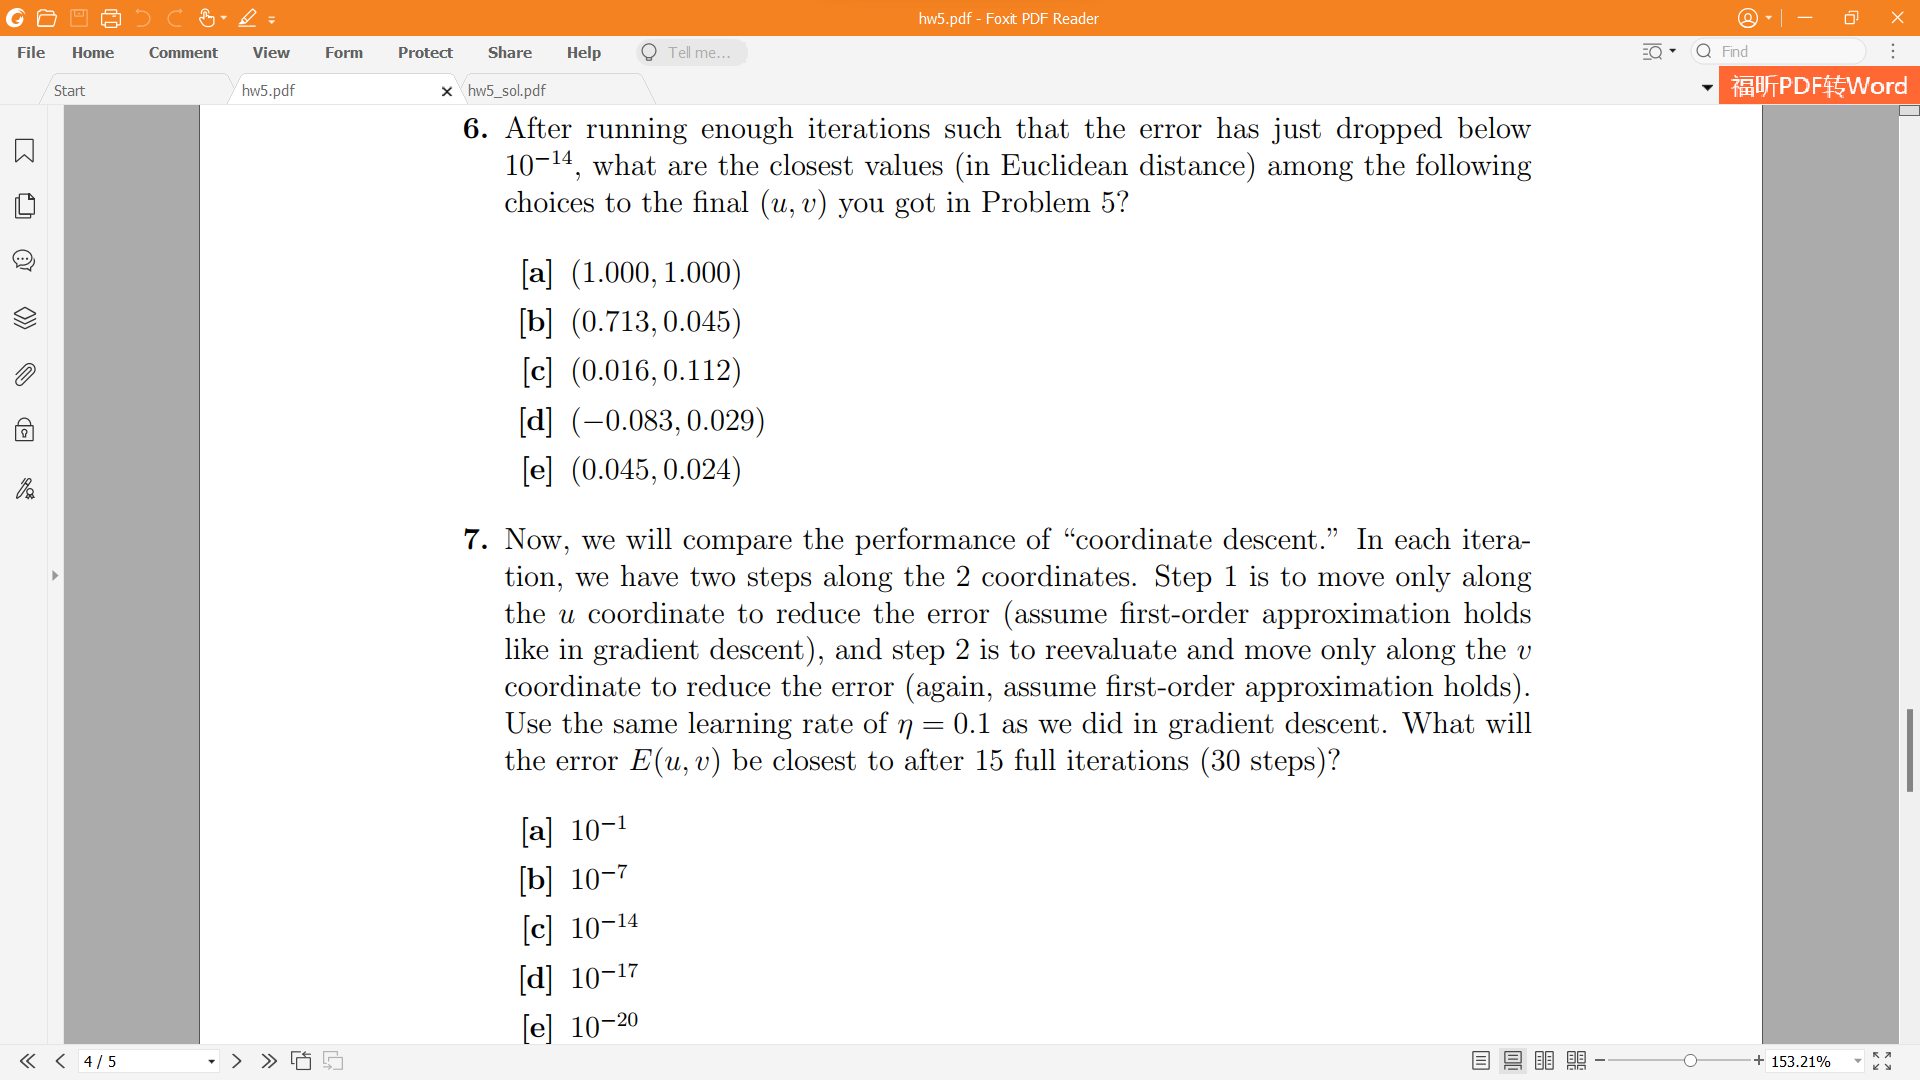

## 4. Explanation and Answer
<u><i><b>Explain</b></i></u>:

We have $E(u,v) = (ue^v - 2ve^{-u})^2$.

We compute the partial derivative of $E(u,v)$ with respect to $u$:

$\frac{\partial E}{\partial u} = 2(u e^v - 2ve^{-u})(e^v + 2ve^{-u})$ 

<font color='yellow'><b>Therefore, the correct answer is: [e] $2(ue^v - 2ve^{-u})(e^v + 2ve^{-u})$.</b></font>


## 5. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Python code below)

<font color='yellow'><b>Therefore, the iterations is: [d] $10$.</b></font>

In [19]:
def E(u, v):
    return (u * math.e ** v - 2 * v * math.e ** (-u)) ** 2

x = np.array([1.0, 1.0])
iterations = 0

while True:
    u, v = x
    derivative_u = 2 * (u * math.e ** v - 2 * v * math.e ** (-u)) * (math.e ** v + 2 * v * math.e ** (-u))
    derivative_v = 2 * (u * math.e ** v - 2 * v * math.e ** (-u)) * (u * math.e ** v - 2 * math.e ** (-u))
    gradient = np.array([derivative_u, derivative_v])
    x -= 0.1 * gradient.astype(float)
    iterations += 1
    if E(x[0], x[1]) < 1e-14:
        break
    

print(f"Iteration: {iterations}")
print(f"Final (u,v) = {x}")


Iteration: 10
Final (u,v) = [0.04473629 0.02395871]


## 6. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Python code below)

<font color='yellow'><b>Therefore, the closet value is: [e] $(0.045, 0.024)$.</b></font>

In [20]:
import numpy as np

final_uv = np.array([0.04473629, 0.02395871])
choices = {
    'a': np.linalg.norm(final_uv - np.array([1.000, 1.000])),
    'b': np.linalg.norm(final_uv - np.array([0.713, 0.045])),
    'c': np.linalg.norm(final_uv - np.array([0.016, 0.112])),
    'd': np.linalg.norm(final_uv - np.array([-0.083, 0.029])),
    'e': np.linalg.norm(final_uv - np.array([0.045, 0.024]))
}

closest_choice = min(choices, key=choices.get)
print(f"Closest choice: {closest_choice}")

Closest choice: e


## 7. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Python code below)

<font color='yellow'><b>Therefore, the closet error is: [a] $10^{-1}$.</b></font>

**<font color='orange'>$h(x) = b$</font>**

In [21]:
def E(u, v):
    return (u * math.e ** v - 2 * v * math.e ** (-u)) ** 2

x = np.array([1.0, 1.0])
iterations = 15

for _ in range(iterations):
    u, v = x
    derivative_u = 2 * (u * math.e ** v - 2 * v * math.e ** (-u)) * (math.e ** v + 2 * v * math.e ** (-u))
    gradient_u = np.array([derivative_u, 0])
    x -= 0.1 * gradient_u.astype(float)
    u, v = x
    derivative_v = 2 * (u * math.e ** v - 2 * v * math.e ** (-u)) * (u * math.e ** v - 2 * math.e ** (-u))
    gradient_v = np.array([0, derivative_v])
    x -= 0.1 * gradient_v.astype(float)


print(f"Final (u,v) = {E(x[0],x[1])}")


Final (u,v) = 0.13981379199615324


## Logistic Regression

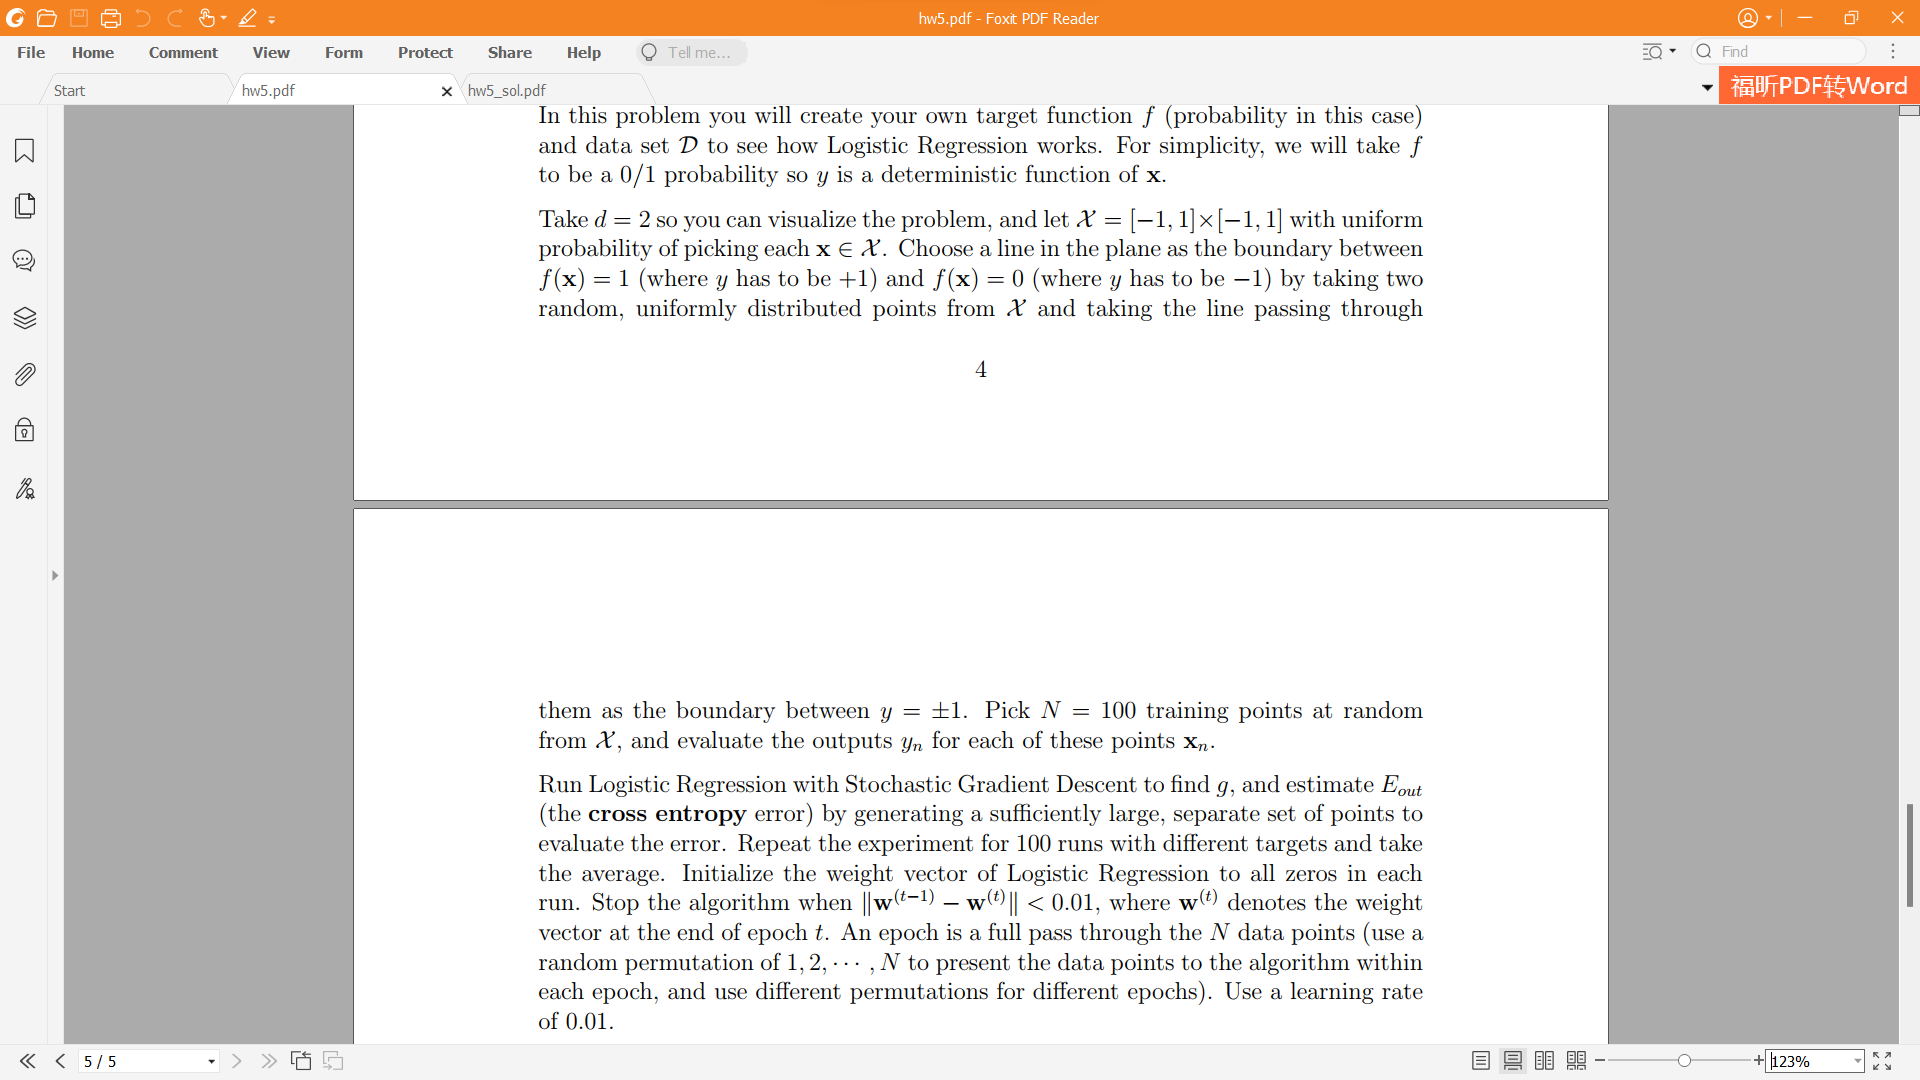

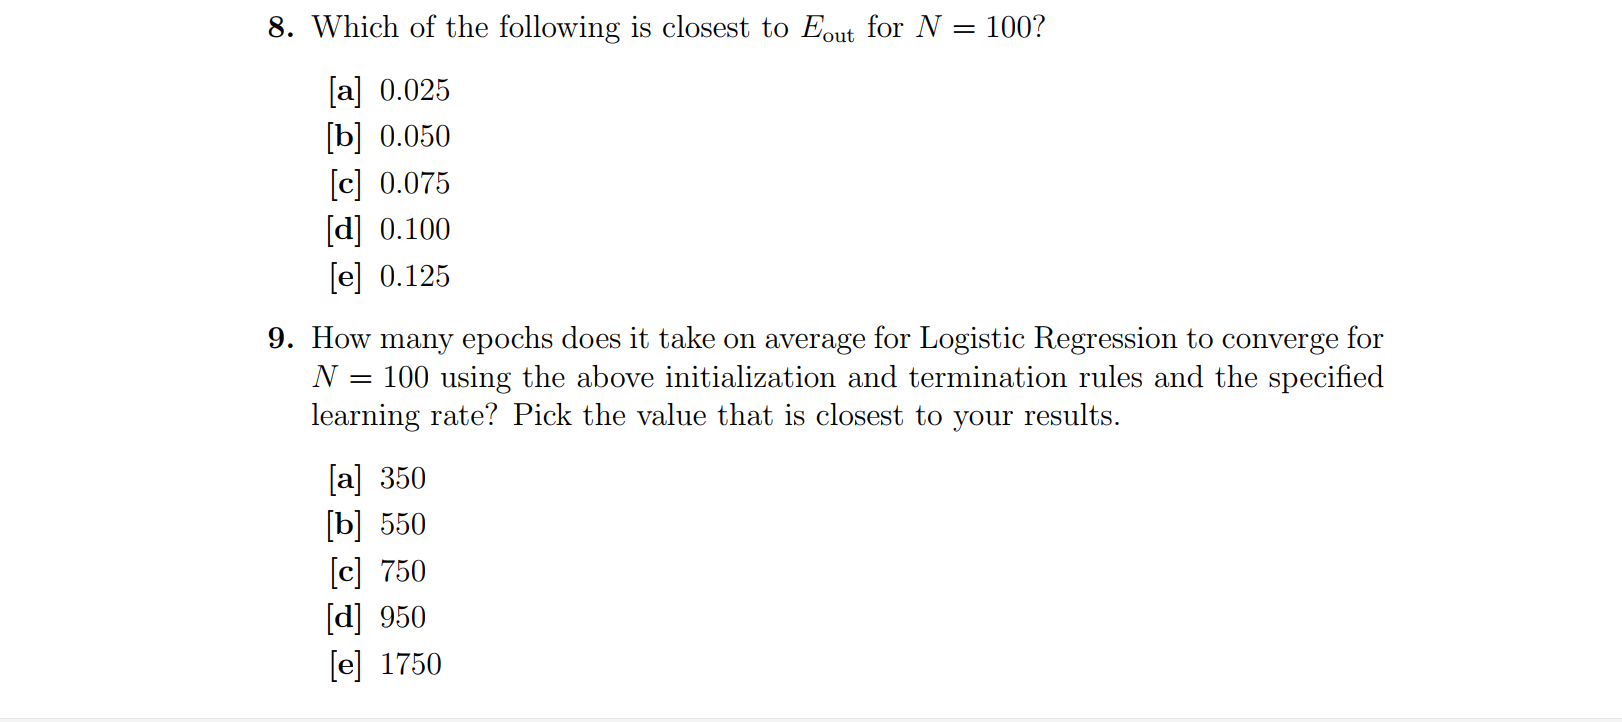

In [22]:
def generate_separating_line():
    A = np.random.uniform(-1, 1, 2)
    B = np.random.uniform(-1, 1, 2)
    m = (B[1] - A[1]) / (B[0] - A[0])
    b = B[1] - m * B[0]  
    w_f = np.array([b, m, -1])
    return w_f

def logistic_regression(X, y_f):
    eta = 0.01
    w_g = np.zeros(3)
    t = 0  # Initialize epoch count
    
    for t in range(10**5):
        indices = list(range(len(X)))
        np.random.shuffle(indices)
        w_old = w_g.copy()
        
        for index in indices:
            xn = X[index, :]
            yn = y_f[index]
            delta_w = -yn * xn / (1 + math.exp(yn * np.dot(w_g.T, xn)))
            w_g = w_g - eta * delta_w
        
        if np.linalg.norm(w_g - w_old) < 0.01:
            break
    
    return w_g, t + 1  # Return the weights and the number of epochs

def calculate_cross_entropy_error(X_test, w_g):
    y_f_test = np.sign(np.dot(X_test, w_g))
    E_out = np.sum(np.log(1 + np.exp(-y_f_test * np.dot(X_test, w_g)))) / len(X_test)
    return E_out

## 8. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Python code below)

<font color='yellow'><b>Therefore, the closet answer is: [d] $0.100$.</b></font>

## 9. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Python code below)

<font color='yellow'><b>Therefore, the closet answer is: [a] 350.</b></font>

In [28]:
def calculate_error_epochs():
    E_out = 0
    epochs = 0
    
    for run in range(100):
        w_f = generate_separating_line()
        
        N = 100
        X = np.transpose(np.array([np.ones(N), np.random.uniform(-1, 1, N), np.random.uniform(-1, 1, N)]))
        y_f = np.sign(np.dot(X, w_f))
        
        w_g, epoch = logistic_regression(X, y_f)
        epochs += epoch
    
        X_test = np.array([np.ones(10000), np.random.uniform(-1, 1, 10000), np.random.uniform(-1, 1, 10000)]).T
        
        E_out += calculate_cross_entropy_error(X_test, w_g)
    
    return E_out / 100, epochs / 100

E_out_avg, epoch_avg = calculate_error_epochs()
print("E_out for N=100: ", E_out_avg)
print("Epochs for N=100: ", epoch_avg)


E_out for N=100:  0.09433617379134063
Epochs for N=100:  341.42


## PLA as SGD

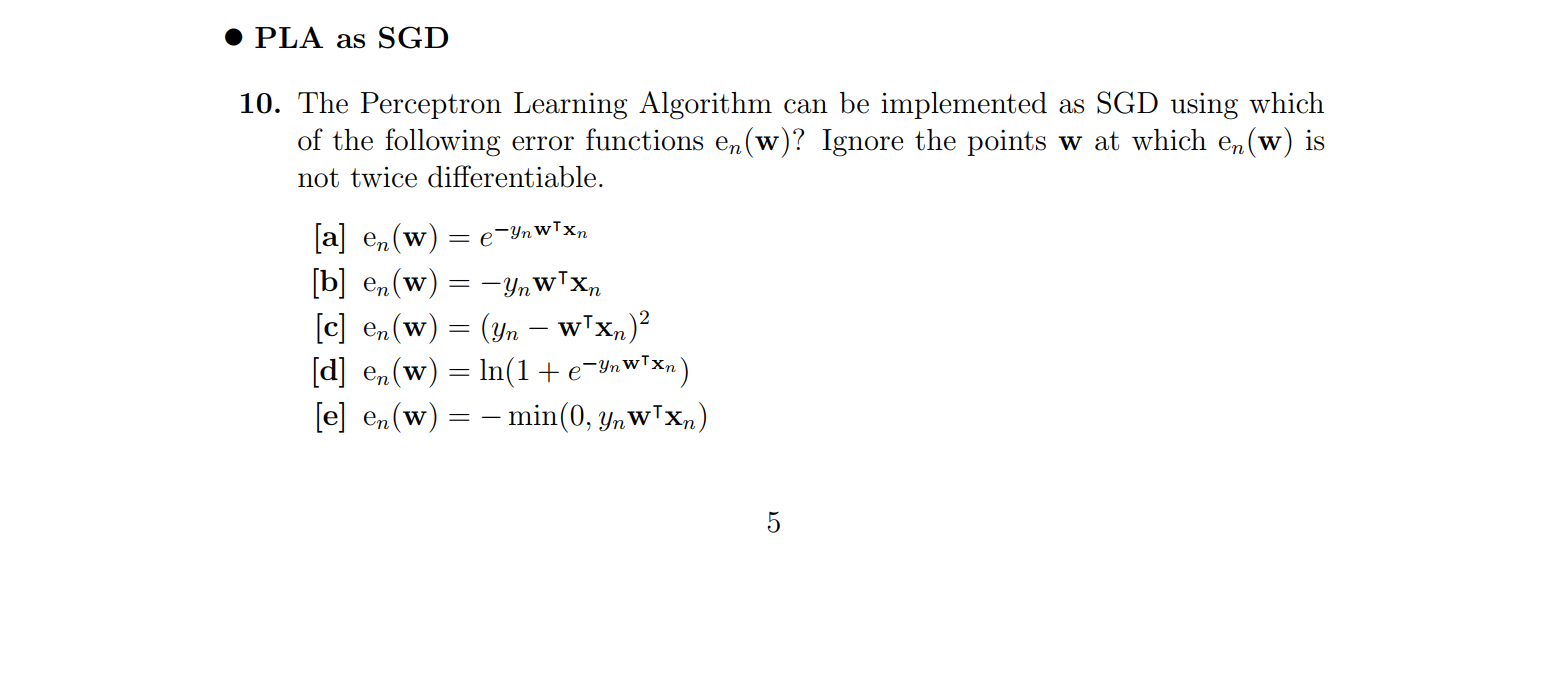

## 10. Explanation and Answer
<u><i><b>Explain</b></i></u>:

- **Error Function Selection:**
  - Initially, $e(\mathbf{w}) = -y \mathbf{w}^T \mathbf{x}$ for SGD.
  - Gradient: $\nabla e = -y \mathbf{x}$.
  - Update Rule: $\mathbf{w} \leftarrow \mathbf{w} + \eta (y \mathbf{x})$.

- **Handling Misclassified Points in PLA:**
  - Modified error function: $e(\mathbf{w}) = - \min(0, y \mathbf{w}^T \mathbf{x})$.
  - Only misclassified points contribute to weight updates.
  - Correctly classified points yield zero gradient ($\nabla e(\mathbf{w}) = \mathbf{0}$).
---
# Error Function Selection

## Starting with an Error Function

We begin with an error function used for SGD:

$$ e(\mathbf{w}) = -y \mathbf{w}^T \mathbf{x} $$

This function helps me understand the direction to adjust our weights.

## Understanding the Gradient

The gradient (direction of steepest ascent) of this function is given by:

$$ \nabla e = -y \mathbf{x} $$

This gradient helps me know how to update our weights.

## Updating Weights

To update the weights, we use:

$$ \mathbf{w} \leftarrow \mathbf{w} + \eta (y \mathbf{x}) $$

Here, $\eta$ controls the size of each update.

# Handling Misclassified Points in PLA

## Focusing on Misclassifications

In the Perceptron Learning Algorithm (PLA), we are concerned only with misclassified points.

## Adjusting the Error Function

To address this, we modify our error function:

$$ e(\mathbf{w}) = - \min(0, y \mathbf{w}^T \mathbf{x}) $$

This change ensures that only misclassified points influence weight updates.

## Handling Correct Classifications

For correctly classified points, the gradient becomes zero:

$$ \nabla e(\mathbf{w}) = \mathbf{0} $$

In simpler terms, this change in the error function allows us to focus on fixing mistakes by adjusting weights only for incorrectly classified points. Correctly classified points don’t cause any weight adjustments.

<font color='yellow'><b>Therefore, the correct answer is: [e] $e_n(\mathbf{w}) = - \min(0, y_n \mathbf{w}^T \mathbf{x_n})$.</b></font>